## Introduction
Author: Alfeo Sabay
#### For Capstone A Heart Disease Prediction: Sabay, Harris, Bejugama, Dr. Jaceldo
This is an exploration of Machine Learning classification techniques on heart attack prediction. This is preliminary work only for the purposes of having a better understanding of the how modern Data Science techniques can be applied to heart attack prediction.

### Data Description
Data from the cleveland14.csv is used in this analysis. Data Source: UCI Machine Learning Repository (http://archive.ics.uci.edu/ml/datasets/Heart+Disease processed.cleveland.data, processed.hungarian.data, processed.switzerland.data, processed.va.data)

Feature variables:
1. age: continuous
2. sex: categorical, male: 1, female: 0
3. chest_pain: categorical, (1: typical angina, 2: atypical angina, 3: non-angina, 4: asymptomatic angina)
4. resting_bp: continous (mmHg), resting blood pressure when admitted to hospital.
5. cholesterol: (serum cholesterol level) continuous (mg/dl)
6. fast_bsugar: fasting blood sugar, categorical, 0: <= 120 mg/dl, 1: > 120 mg/dl
7. resting_ecg: resting electrocardiography, categorical, 0: normal, 1: ST-T wave abnormality, 2: leftventricular hypertropy
8. max_hrate: maximum heartrate achieved from thalium test. continuos
9. exer_angina: exercise induced angina. categorical (0:no, 1:yes)
10. oldpeak: ST depression induced by exercise relative to rest. continuous
11. slope: slope of peak exercise ST segment. categorical, 1: upsloping, 2: flat, 3: downsloping
12. ca_mavessel: number of major vessels colored by fluoroscopy: discrete (0,1,2,3,4)
13. heart_def_status: defect status code from thalium test, categorical, 3: normal, 6: fixed defect, 7: reversible defect
14. diag: (response variable) diagnoses of heart disease, categorical, 0: no 1: yes

Credit to Ty Shaikh for an advanced classification project on heart disease using data from UCI ML Repository (https://github.com/ty-shaikh/advanced-classification-example)


In [6]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from pprint import pprint


# Read consolidated heart disease data
columns = ["age", "sex", "chest_pain", "resting_bp", "cholesterol", "fast_bsugar", "resting_ecg", 
           "max_hrate", "exer_angina", "oldpeak", "slope", "ca_mavessel", "heart_def_status", "diag"]
df_main = pd.read_table("data/cleveland14_capstone.csv", sep=',', header=None, names=columns)


### Descriptive Analysis


In [7]:
df_main.head()

,age,sex,chest_pain,resting_bp,cholesterol,fast_bsugar,resting_ecg,max_hrate,exer_angina,oldpeak,slope,ca_mavessel,heart_def_status,diag
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0.0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2.0
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1.0
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0.0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0.0


In [8]:
df_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
age                 297 non-null float64
sex                 297 non-null float64
chest_pain          297 non-null float64
resting_bp          297 non-null float64
cholesterol         297 non-null float64
fast_bsugar         297 non-null float64
resting_ecg         297 non-null float64
max_hrate           297 non-null float64
exer_angina         297 non-null float64
oldpeak             297 non-null float64
slope               297 non-null float64
ca_mavessel         297 non-null float64
heart_def_status    297 non-null float64
diag                297 non-null float64
dtypes: float64(14)
memory usage: 32.6 KB


In [9]:
df_main.describe(include='all').T.reset_index()

,index,count,mean,std,min,25%,50%,75%,max
0,age,297.0,54.542088,9.049736,29.0,48.0,56.0,61.0,77.0
1,sex,297.0,0.676768,0.468500,0.0,0.0,1.0,1.0,1.0
2,chest_pain,297.0,3.158249,0.964859,1.0,3.0,3.0,4.0,4.0
3,resting_bp,297.0,131.693603,17.762806,94.0,120.0,130.0,140.0,200.0
4,cholesterol,297.0,247.350168,51.997583,126.0,211.0,243.0,276.0,564.0
5,fast_bsugar,297.0,0.144781,0.352474,0.0,0.0,0.0,0.0,1.0
6,resting_ecg,297.0,0.996633,0.994914,0.0,0.0,1.0,2.0,2.0
7,max_hrate,297.0,149.599327,22.941562,71.0,133.0,153.0,166.0,202.0
8,exer_angina,297.0,0.326599,0.469761,0.0,0.0,0.0,1.0,1.0
9,oldpeak,297.0,1.055556,1.166123,0.0,0.0,0.8,1.6,6.2


### Plots

/home/sabaysmu/miniconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


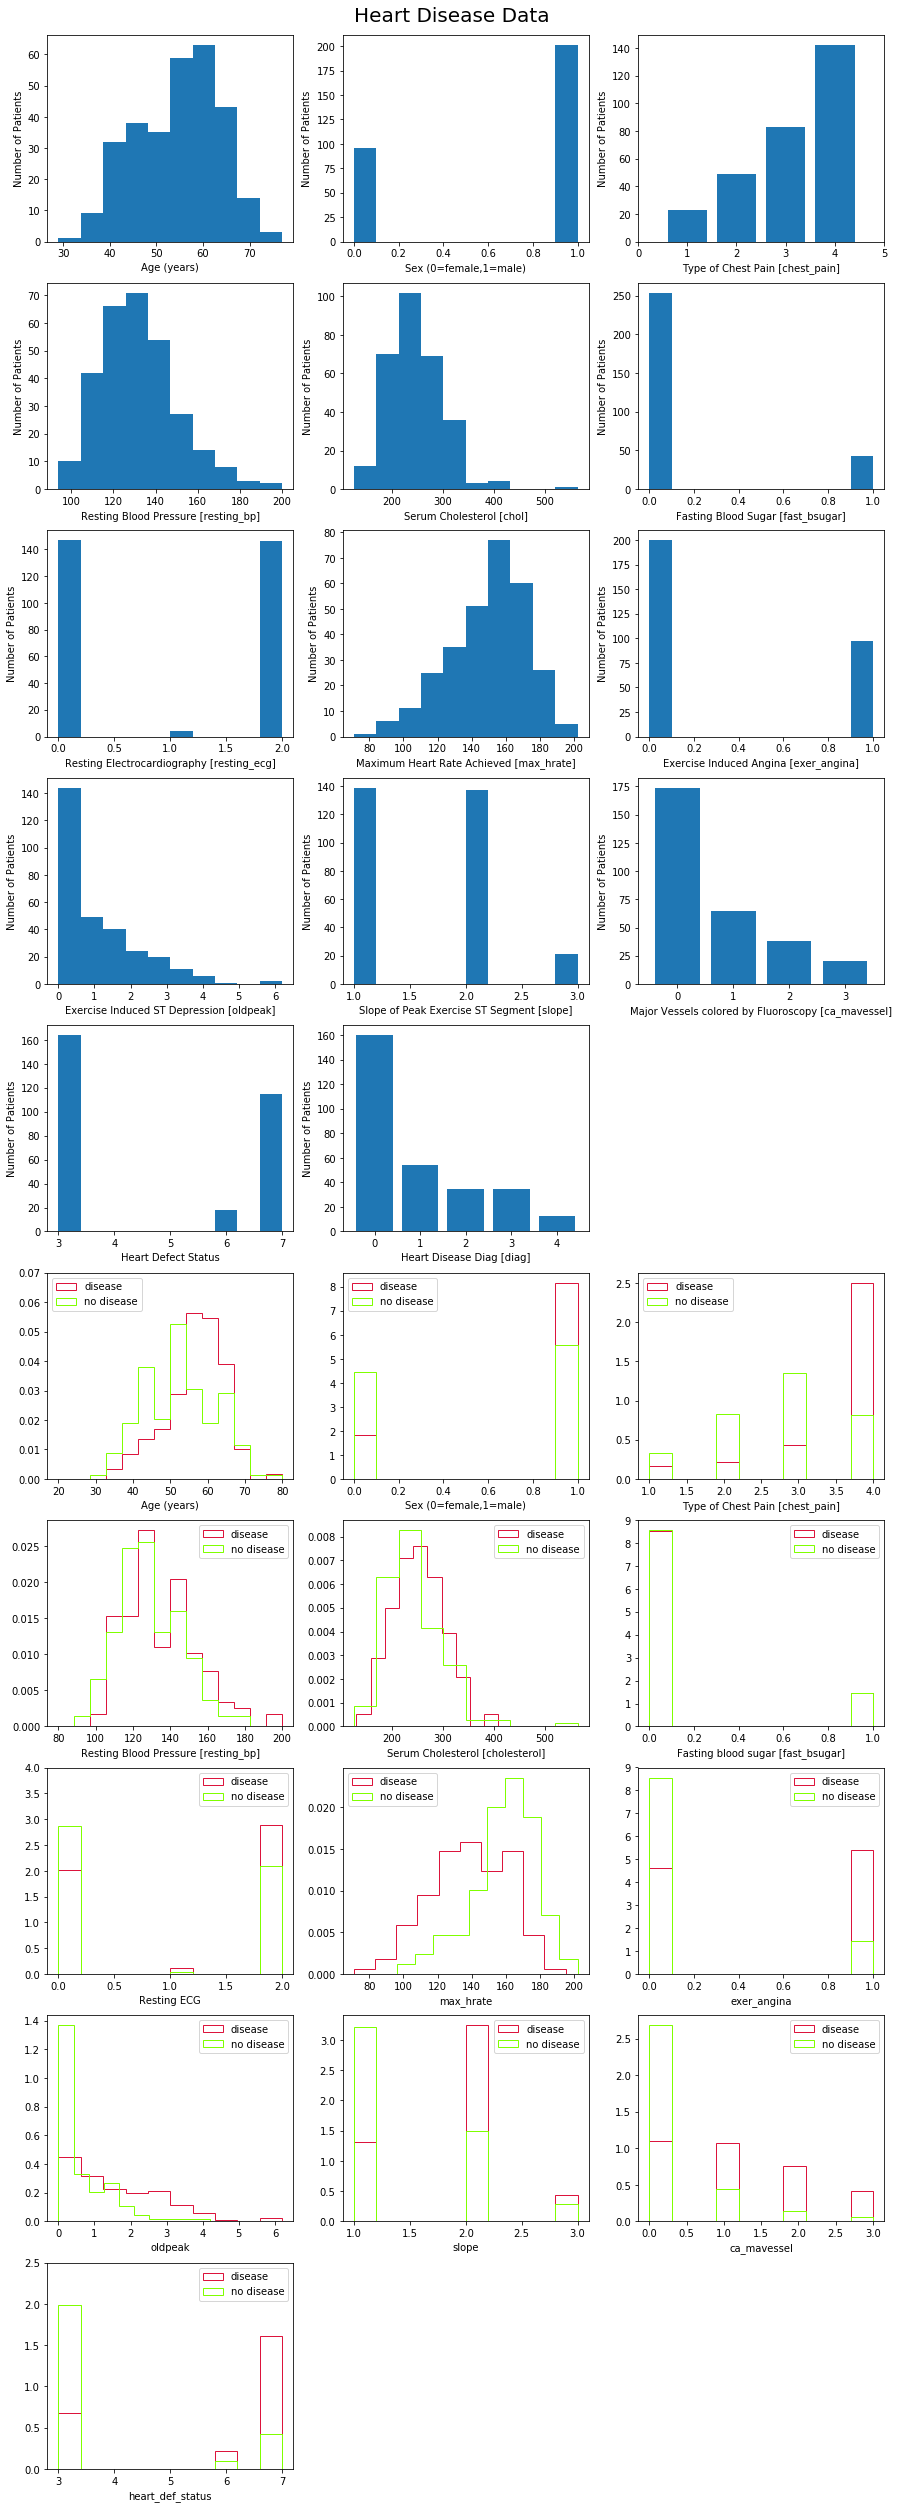

Intrinsic discrepancies between disease and no-disease, in decreasing order: 
   0.598343  (heart_def_status)
   0.576407  (chest_pain)
   0.499201  (ca_mavessel)
   0.446009  (max_hrate)
   0.418676  (oldpeak)
   0.342000  (exer_angina)
   0.305269  (slope)
   0.202085  (age)
   0.152634  (sex)
   0.064761  (resting_ecg)
   0.040972  (cholesterol)
   0.032844  (resting_bp)
   0.000020  (fast_bsugar)

Number of patients in dataframe: 297, with disease: 137, without disease: 160

    age  sex  resting_bp  cholesterol  fast_bsugar  max_hrate  exer_angina  \
0  63.0  1.0       145.0        233.0          1.0      150.0          0.0   
1  67.0  1.0       160.0        286.0          0.0      108.0          1.0   
2  67.0  1.0       120.0        229.0          0.0      129.0          1.0   
3  37.0  1.0       130.0        250.0          0.0      187.0          0.0   
4  41.0  0.0       130.0        204.0          0.0      172.0          0.0   

   oldpeak  ca_mavessel  heart_diag  chest_pain

In [10]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer

fig, axis = plt.subplots( nrows=10, ncols=3, figsize=(15,40) )
plt.subplots_adjust( wspace=0.20, hspace=0.20, top=0.97 )
plt.suptitle("Heart Disease Data", fontsize=20)
axis[0,0].hist(df_main.age)
axis[0,0].set_xlabel("Age (years)")
axis[0,0].set_ylabel("Number of Patients")
axis[0,1].hist(df_main.sex)
axis[0,1].set_xlabel("Sex (0=female,1=male)")
axis[0,1].set_ylabel("Number of Patients")
axis[0,2].hist(df_main.chest_pain,bins=4,range=(0.5,4.5),rwidth=0.80)
axis[0,2].set_xlim(0.0,5.0)
axis[0,2].set_xlabel("Type of Chest Pain [chest_pain]")
axis[0,2].set_ylabel("Number of Patients")
axis[1,0].hist(df_main.resting_bp)
axis[1,0].set_xlabel("Resting Blood Pressure [resting_bp]")
axis[1,0].set_ylabel("Number of Patients")
axis[1,1].hist(df_main.cholesterol)
axis[1,1].set_xlabel("Serum Cholesterol [chol]")
axis[1,1].set_ylabel("Number of Patients")
axis[1,2].hist(df_main.fast_bsugar)
axis[1,2].set_xlabel("Fasting Blood Sugar [fast_bsugar]")
axis[1,2].set_ylabel("Number of Patients")
axis[2,0].hist(df_main.resting_ecg)
axis[2,0].set_xlabel("Resting Electrocardiography [resting_ecg]")
axis[2,0].set_ylabel("Number of Patients")
axis[2,1].hist(df_main.max_hrate)
axis[2,1].set_xlabel("Maximum Heart Rate Achieved [max_hrate]")
axis[2,1].set_ylabel("Number of Patients")
axis[2,2].hist(df_main.exer_angina)
axis[2,2].set_xlabel("Exercise Induced Angina [exer_angina]")
axis[2,2].set_ylabel("Number of Patients")
axis[3,0].hist(df_main.oldpeak)
axis[3,0].set_xlabel("Exercise Induced ST Depression [oldpeak]")
axis[3,0].set_ylabel("Number of Patients")
axis[3,1].hist(df_main.slope)
axis[3,1].set_xlabel("Slope of Peak Exercise ST Segment [slope]")
axis[3,1].set_ylabel("Number of Patients")
axis[3,2].hist(df_main.ca_mavessel,bins=4,range=(-0.5,3.5),rwidth=0.8)
axis[3,2].set_xlim(-0.7,3.7)
axis[3,2].set_xlabel("Major Vessels colored by Fluoroscopy [ca_mavessel]")
axis[3,2].set_ylabel("Number of Patients")
axis[4,0].hist(df_main.heart_def_status)
axis[4,0].set_xlabel("Heart Defect Status")
axis[4,0].set_ylabel("Number of Patients")
axis[4,1].hist(df_main.diag,bins=5,range=(-0.5,4.5),rwidth=0.8)
axis[4,1].set_xlim(-0.7,4.7)
axis[4,1].set_xlabel("Heart Disease Diag [diag]")
axis[4,1].set_ylabel("Number of Patients")
axis[4,2].axis("off")

# Marginal feature distributions compared for disease and no-disease (likelihoods)
bins = np.linspace(20, 80, 15)
axis[5,0].hist(df_main[df_main.diag>0].age.tolist(),bins,color=["crimson"],histtype="step",label="disease",normed=True)
axis[5,0].hist(df_main[df_main.diag==0].age,bins,color=["chartreuse"],histtype="step",label="no disease",normed=True)
axis[5,0].set_xlabel("Age (years)")
axis[5,0].set_ylim(0.0,0.070)
axis[5,0].legend(prop={'size': 10},loc="upper left")
axis[5,1].hist(df_main[df_main.diag>0].sex.tolist(),color=["crimson"],histtype="step",label="disease",normed=True)
axis[5,1].hist(df_main[df_main.diag==0].sex,color=["chartreuse"],histtype="step",label="no disease",normed=True)
axis[5,1].set_xlabel("Sex (0=female,1=male)")
axis[5,1].legend(prop={'size': 10},loc="upper left")
axis[5,2].hist(df_main[df_main.diag>0].chest_pain.tolist(),color=["crimson"],histtype="step",label="disease",normed=True)
axis[5,2].hist(df_main[df_main.diag==0].chest_pain,color=["chartreuse"],histtype="step",label="no disease",normed=True)
axis[5,2].set_xlabel("Type of Chest Pain [chest_pain]")
axis[5,2].legend(prop={'size': 10},loc="upper left")
bins = np.linspace(80, 200, 15)
axis[6,0].hist(df_main[df_main.diag>0].resting_bp.tolist(),bins,color=["crimson"],histtype="step",label="disease",normed=True)
axis[6,0].hist(df_main[df_main.diag==0].resting_bp,bins,color=["chartreuse"],histtype="step",label="no disease",normed=True)
axis[6,0].set_xlabel("Resting Blood Pressure [resting_bp]")
axis[6,0].legend(prop={'size': 10},loc="upper right")
axis[6,1].hist(df_main[df_main.diag>0].cholesterol.tolist(),color=["crimson"],histtype="step",label="disease",normed=True)
axis[6,1].hist(df_main[df_main.diag==0].cholesterol,color=["chartreuse"],histtype="step",label="no disease",normed=True)
axis[6,1].set_xlabel("Serum Cholesterol [cholesterol]")
axis[6,1].legend(prop={'size': 10},loc="upper right")
axis[6,2].hist(df_main[df_main.diag>0].fast_bsugar.tolist(),color=["crimson"],histtype="step",label="disease",normed=True)
axis[6,2].hist(df_main[df_main.diag==0].fast_bsugar,color=["chartreuse"],histtype="step",label="no disease",normed=True)
axis[6,2].set_xlabel("Fasting blood sugar [fast_bsugar]")
axis[6,2].legend(prop={'size': 10},loc="upper right")
axis[7,0].hist(df_main[df_main.diag>0].resting_ecg.tolist(),color=["crimson"],histtype="step",label="disease",normed=True)
axis[7,0].hist(df_main[df_main.diag==0].resting_ecg,color=["chartreuse"],histtype="step",label="no disease",normed=True)
axis[7,0].set_xlabel("Resting ECG")
axis[7,0].set_ylim(0.0,4.0)
axis[7,0].legend(prop={'size': 10},loc="upper right")
axis[7,1].hist(df_main[df_main.diag>0].max_hrate.tolist(),color=["crimson"],histtype="step",label="disease",normed=True)
axis[7,1].hist(df_main[df_main.diag==0].max_hrate,color=["chartreuse"],histtype="step",label="no disease",normed=True)
axis[7,1].set_xlabel("max_hrate")
axis[7,1].legend(prop={'size': 10},loc="upper left")
axis[7,2].hist(df_main[df_main.diag>0].exer_angina.tolist(),color=["crimson"],histtype="step",label="disease",normed=True)
axis[7,2].hist(df_main[df_main.diag==0].exer_angina,color=["chartreuse"],histtype="step",label="no disease",normed=True)
axis[7,2].set_xlabel("exer_angina")
axis[7,2].legend(prop={'size': 10},loc="upper right")
axis[8,0].hist(df_main[df_main.diag>0].oldpeak.tolist(),color=["crimson"],histtype="step",label="disease",normed=True)
axis[8,0].hist(df_main[df_main.diag==0].oldpeak,color=["chartreuse"],histtype="step",label="no disease",normed=True)
axis[8,0].set_xlabel("oldpeak")
axis[8,0].legend(prop={'size': 10},loc="upper right")
axis[8,1].hist(df_main[df_main.diag>0].slope.tolist(),color=["crimson"],histtype="step",label="disease",normed=True)
axis[8,1].hist(df_main[df_main.diag==0].slope,color=["chartreuse"],histtype="step",label="no disease",normed=True)
axis[8,1].set_xlabel("slope")
axis[8,1].legend(prop={'size': 10},loc="upper right")
axis[8,2].hist(df_main[df_main.diag>0].ca_mavessel.tolist(),color=["crimson"],histtype="step",label="disease",normed=True)
axis[8,2].hist(df_main[df_main.diag==0].ca_mavessel,color=["chartreuse"],histtype="step",label="no disease",normed=True)
axis[8,2].set_xlabel("ca_mavessel")
axis[8,2].legend(prop={'size': 10},loc="upper right")
axis[9,0].hist(df_main[df_main.diag>0].heart_def_status.tolist(),color=["crimson"],histtype="step",label="disease",normed=True)
axis[9,0].hist(df_main[df_main.diag==0].heart_def_status,color=["chartreuse"],histtype="step",label="no disease",normed=True)
axis[9,0].set_xlabel("heart_def_status")
axis[9,0].set_ylim(0.0,2.5)
axis[9,0].legend(prop={'size': 10},loc="upper right")
axis[9,1].axis("off")
axis[9,2].axis("off")
plt.show()

# Given two histograms x and y (with the same range and binning), the following function
# calculates the intrinsic discrepancy (a symmetrized Kullback-Leibler distance) between them.

def intrinsic_discrepancy(x,y):
    assert len(x)==len(y)
    sumx = sum(xval for xval in x)
    sumy = sum(yval for yval in y)
    id1  = 0.0
    id2  = 0.0
    for (xval,yval) in zip(x,y):
        if (xval>0) and (yval>0):
            id1 += (float(xval)/sumx) * np.log((float(xval)/sumx)/(float(yval)/sumy))
            id2 += (float(yval)/sumy) * np.log((float(yval)/sumy)/(float(xval)/sumx))
    return min(id1,id2)

# Compute intrinsic discrepancies between disease and no-disease feature distributions
int_discr = {}
hist,bin_edges   = np.histogram(df_main.age,density=False)
hist1,bin_edges1 = np.histogram(df_main[df_main.diag>0].age,bins=bin_edges,density=False)
hist2,bin_edges2 = np.histogram(df_main[df_main.diag==0].age,bins=bin_edges,density=False)
int_discr["age"] = intrinsic_discrepancy(hist1,hist2)
hist1,bin_edges1 = np.histogram(df_main[df_main.diag>0].sex,bins=(-0.5,0.5,1.5),density=False)
hist2,bin_edges2 = np.histogram(df_main[df_main.diag==0].sex,bins=(-0.5,0.5,1.5),density=False)
int_discr["sex"] = intrinsic_discrepancy(hist1,hist2)
hist1,bin_edges1 = np.histogram(df_main[df_main.diag>0].chest_pain,bins=(0.5,1.5,2.5,3.5,4.5),density=False)
hist2,bin_edges2 = np.histogram(df_main[df_main.diag==0].chest_pain,bins=(0.5,1.5,2.5,3.5,4.5),density=False)
int_discr["chest_pain"] = intrinsic_discrepancy(hist1,hist2)
hist,bin_edges   = np.histogram(df_main.resting_bp,density=False)
hist1,bin_edges1 = np.histogram(df_main[df_main.diag>0].resting_bp,bins=bin_edges,density=False)
hist2,bin_edges2 = np.histogram(df_main[df_main.diag==0].resting_bp,bins=bin_edges,density=False)
int_discr["resting_bp"] = intrinsic_discrepancy(hist1,hist2)
hist,bin_edges   = np.histogram(df_main.cholesterol,density=False)
hist1,bin_edges1 = np.histogram(df_main[df_main.diag>0].cholesterol,bins=bin_edges,density=False)
hist2,bin_edges2 = np.histogram(df_main[df_main.diag==0].cholesterol,bins=bin_edges,density=False)
int_discr["cholesterol"] = intrinsic_discrepancy(hist1,hist2)
hist1,bin_edges1 = np.histogram(df_main[df_main.diag>0].fast_bsugar,bins=(-0.5,0.5,1.5),density=False)
hist2,bin_edges2 = np.histogram(df_main[df_main.diag==0].fast_bsugar,bins=(-0.5,0.5,1.5),density=False)
int_discr["fast_bsugar"] = intrinsic_discrepancy(hist1,hist2)
hist1,bin_edges1 = np.histogram(df_main[df_main.diag>0].resting_ecg,bins=(-0.5,0.5,1.5,2.5),density=False)
hist2,bin_edges2 = np.histogram(df_main[df_main.diag==0].resting_ecg,bins=(-0.5,0.5,1.5,2.5),density=False)
int_discr["resting_ecg"] = intrinsic_discrepancy(hist1,hist2)
hist,bin_edges   = np.histogram(df_main.max_hrate,density=False)
hist1,bin_edges1 = np.histogram(df_main[df_main.diag>0].max_hrate,bins=bin_edges,density=False)
hist2,bin_edges2 = np.histogram(df_main[df_main.diag==0].max_hrate,bins=bin_edges,density=False)
int_discr["max_hrate"] = intrinsic_discrepancy(hist1,hist2)
hist1,bin_edges1 = np.histogram(df_main[df_main.diag>0].exer_angina,bins=(-0.5,0.5,1.5),density=False)
hist2,bin_edges2 = np.histogram(df_main[df_main.diag==0].exer_angina,bins=(-0.5,0.5,1.5),density=False)
int_discr["exer_angina"] = intrinsic_discrepancy(hist1,hist2)
hist,bin_edges   = np.histogram(df_main.oldpeak,density=False)
hist1,bin_edges1 = np.histogram(df_main[df_main.diag>0].oldpeak,bins=bin_edges,density=False)
hist2,bin_edges2 = np.histogram(df_main[df_main.diag==0].oldpeak,bins=bin_edges,density=False)
int_discr["oldpeak"] = intrinsic_discrepancy(hist1,hist2)
hist1,bin_edges1 = np.histogram(df_main[df_main.diag>0].slope,bins=(0.5,1.5,2.5,3.5),density=False)
hist2,bin_edges2 = np.histogram(df_main[df_main.diag==0].slope,bins=(0.5,1.5,2.5,3.5),density=False)
int_discr["slope"] = intrinsic_discrepancy(hist1,hist2)
hist1,bin_edges1 = np.histogram(df_main[df_main.diag>0].ca_mavessel,bins=(-0.5,0.5,1.5,2.5,3.5),density=False)
hist2,bin_edges2 = np.histogram(df_main[df_main.diag==0].ca_mavessel,bins=(-0.5,0.5,1.5,2.5,3.5),density=False)
int_discr["ca_mavessel"] = intrinsic_discrepancy(hist1,hist2)
hist1,bin_edges1 = np.histogram(df_main[df_main.diag>0].heart_def_status,bins=(2.5,3.5,6.5,7.5),density=False)
hist2,bin_edges2 = np.histogram(df_main[df_main.diag==0].heart_def_status,bins=(2.5,3.5,6.5,7.5),density=False)
int_discr["heart_def_status"] = intrinsic_discrepancy(hist1,hist2)
id_list = Counter(int_discr).most_common()

print('Intrinsic discrepancies between disease and no-disease, in decreasing order: ')
for item in id_list:
    print('   %f  (%s)' % (item[1],item[0]))
    
# Data transformation section
# Convert categorical variables with more than two values into dummy variables.
# Note that variable ca is discrete but not categorical, so we don't convert it.
# Standardize and Normalize data
df      = df_main.copy()
dummies = pd.get_dummies(df["chest_pain"],prefix="chest_pain")
df      = df.join(dummies)
del df["chest_pain"]
del df["chest_pain_4.0"]
df      = df.rename(columns = {"chest_pain_1.0":"chest_pain_1","chest_pain_2.0":"chest_pain_2","chest_pain_3.0":"chest_pain_3"})

dummies = pd.get_dummies(df["resting_ecg"],prefix="resting_ecg")
df      = df.join(dummies)
del df["resting_ecg"]
del df["resting_ecg_0.0"]
df      = df.rename(columns = {"resting_ecg_1.0":"resting_ecg_1","resting_ecg_2.0":"resting_ecg_2"})

dummies = pd.get_dummies(df["slope"],prefix="slope")
df      = df.join(dummies)
del df["slope"]
del df["slope_2.0"]
df      = df.rename(columns = {"slope_1.0":"slope_1","slope_3.0":"slope_3"})

dummies = pd.get_dummies(df["heart_def_status"],prefix="heart_def_status")
df      = df.join(dummies)
del df["heart_def_status"]
del df["heart_def_status_3.0"]
df      = df.rename(columns = {"heart_def_status_6.0":"heart_def_status_6","heart_def_status_7.0":"heart_def_status_7"})

# Replace response variable values and rename
df["diag"].replace(to_replace=[1,2,3,4],value=1,inplace=True)
df      = df.rename(columns = {"diag":"heart_diag"})

# New list of column labels after the above operations
new_columns_1 = ["age", "sex", "resting_bp", "cholesterol", "fast_bsugar", "max_hrate", 
                 "exer_angina", "oldpeak", "ca_mavessel", "heart_diag", "chest_pain_1", "chest_pain_2",
                 "chest_pain_3", "resting_ecg_1", "resting_ecg_2", "slope_1", "slope_3",
                 "heart_def_status_6", "heart_def_status_7"]

print('\nNumber of patients in dataframe: %i, with disease: %i, without disease: %i\n' \
      % (len(df.index),len(df[df.heart_diag==1].index),len(df[df.heart_diag==0].index)))
print(df.head())
print(df.describe())

# Standardize the dataframe
stdcols = ["age","resting_bp","cholesterol","max_hrate","oldpeak"]
nrmcols = ["ca_mavessel"]
stddf   = df.copy()
scl = StandardScaler()
nrm = Normalizer()

'''stddf[stdcols] = stddf[stdcols].apply(lambda x: (x-x.mean())/x.std())
stddf[nrmcols] = stddf[nrmcols].apply(lambda x: (x-x.mean())/(x.max()-x.min()))'''

stddf[stdcols] = scl.fit_transform(stddf[stdcols])
stddf[nrmcols] = nrm.fit_transform(stddf[nrmcols])

new_columns_2 = new_columns_1[:9] + new_columns_1[10:]
new_columns_2.insert(0,new_columns_1[9])
stddf = stddf.reindex(columns=new_columns_2)

# Convert dataframe into lists for use by classifiers
yall = stddf["heart_diag"]
Xall = stddf[new_columns_2[1:]].values

In [11]:
stddf.head()

,heart_diag,age,sex,resting_bp,cholesterol,fast_bsugar,max_hrate,exer_angina,oldpeak,ca_mavessel,chest_pain_1,chest_pain_2,chest_pain_3,resting_ecg_1,resting_ecg_2,slope_1,slope_3,heart_def_status_6,heart_def_status_7
0,0.0,0.936181,1.0,0.750380,-0.276443,1.0,0.017494,0.0,1.068965,0.0,1,0,0,0,1,0,1,1,0
1,1.0,1.378929,1.0,1.596266,0.744555,0.0,-1.816334,1.0,0.381773,1.0,0,0,0,0,1,0,0,0,0
2,1.0,1.378929,1.0,-0.659431,-0.353500,0.0,-0.899420,1.0,1.326662,1.0,0,0,0,0,1,0,0,0,1
3,0.0,-1.941680,1.0,-0.095506,0.051047,0.0,1.633010,0.0,2.099753,0.0,0,0,1,0,0,0,1,0,0
4,0.0,-1.498933,0.0,-0.095506,-0.835103,0.0,0.978071,0.0,0.295874,0.0,0,1,0,0,1,1,0,0,0


In [12]:
stddf.describe().T

,count,mean,std,min,25%,50%,75%,max
heart_diag,297.0,4.612795e-01,0.499340,0.000000,0.000000,0.000000,1.000000,1.000000
age,297.0,-1.226105e-16,1.001688,-2.827176,-0.724124,0.161372,0.714807,2.485798
sex,297.0,6.767677e-01,0.468500,0.000000,0.000000,1.000000,1.000000,1.000000
resting_bp,297.0,4.904420e-16,1.001688,-2.125634,-0.659431,-0.095506,0.468418,3.851964
cholesterol,297.0,-1.958777e-16,1.001688,-2.337704,-0.700254,-0.083802,0.551914,6.099981
fast_bsugar,297.0,1.447811e-01,0.352474,0.000000,0.000000,0.000000,0.000000,1.000000
max_hrate,297.0,4.784800e-16,1.001688,-3.431849,-0.724769,0.148482,0.716096,2.287949
exer_angina,297.0,3.265993e-01,0.469761,0.000000,0.000000,0.000000,1.000000,1.000000
oldpeak,297.0,0.000000e+00,1.001688,-0.906712,-0.906712,-0.219520,0.467672,4.419026
ca_mavessel,297.0,4.141414e-01,0.493404,0.000000,0.000000,0.000000,1.000000,1.000000


### Logistic Regression with 10 fold cross-validation

In [51]:
# Logistic Regression with 10 fold cross-validation
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn import metrics as mt
from sklearn.model_selection import StratifiedShuffleSplit as ssplt
from sklearn.model_selection import StratifiedKFold as skfold
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score, recall_score, accuracy_score


yhat = np.zeros(yall.shape) # prediction bucket
num_cv_iterations = 10
num_instances = len(yall)
cv_object = ssplt(n_splits=num_cv_iterations,
                         test_size  = 0.2)

# Use GridSearchCV to find optimal hyperparameters, then use it in validation loop
X_train, X_test, y_train, y_test = train_test_split(Xall, yall)

pipeline = Pipeline([('clf', LogisticRegression())])
parameters = {
'clf__penalty': ('l1','l2'),
'clf__C': (0.01, 0.1, 1, 10),
}

grid_search = GridSearchCV(pipeline, parameters, n_jobs=1,verbose=1, scoring='accuracy', cv=num_cv_iterations)
X_train, X_test, y_train, y_test = train_test_split(Xall, yall)
grid_search.fit(X_train, y_train)
print('Best score: %0.3f' % grid_search.best_score_)
print('Best parameters set:') 
best_parameters = grid_search.best_estimator_.get_params()
for param_name in sorted(parameters.keys()):
    print('\t%s: %r' % (param_name, best_parameters[param_name]))
    predictions = grid_search.predict(X_test)
    print('Accuracy:', accuracy_score(y_test, predictions))
    print('Precision:', precision_score(y_test, predictions))
    print('Recall:', recall_score(y_test, predictions))

# Use cv_object to cross-validate using the grid_search object's tuned parameters
iter_num=0
# the indices are the rows used for training and testing in each iteration
for train_indices, test_indices in cv_object.split(Xall,yall): 
    # I will create new variables here so that it is more obvious what 
    # the code is doing (you can compact this syntax and avoid duplicating memory,
    # but it makes this code less readable)
    X_train = Xall[train_indices]
    y_train = yall[train_indices]
    
    X_test = Xall[test_indices]
    y_test = yall[test_indices]
    
    # train the reusable logisitc regression model on the training data
    grid_search.fit(X_train,y_train)  # train object
    y_hat = grid_search.predict(X_test) # get test set precitions

    # now let's get the accuracy and confusion matrix for this iterations of training/testing
    acc = mt.accuracy_score(y_test,y_hat)
    conf = mt.confusion_matrix(y_test,y_hat)
    print("====Iteration",iter_num," ====")
    print("accuracy", acc )
    print('Precision:', precision_score(y_test, y_hat))
    print('Recall:', recall_score(y_test, y_hat))
    print("confusion matrix\n",conf)
    iter_num+=1
    
# Also note that every time you run the above code
#   it randomly creates a new training and testing set, 
#   so accuracy will be different each time'''




Fitting 10 folds for each of 8 candidates, totalling 80 fits


[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:    0.2s finished


Best score: 0.829
Best parameters set:
	clf__C: 1
Accuracy: 0.88
Precision: 0.9444444444444444
Recall: 0.8292682926829268
	clf__penalty: 'l2'
Accuracy: 0.88
Precision: 0.9444444444444444
Recall: 0.8292682926829268
Fitting 10 folds for each of 8 candidates, totalling 80 fits


[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:    0.2s finished


====Iteration 0  ====
accuracy 0.8333333333333334
Precision: 0.875
Recall: 0.75
confusion matrix
 [[29  3]
 [ 7 21]]
Fitting 10 folds for each of 8 candidates, totalling 80 fits


[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:    0.2s finished


====Iteration 1  ====
accuracy 0.85
Precision: 0.8518518518518519
Recall: 0.8214285714285714
confusion matrix
 [[28  4]
 [ 5 23]]
Fitting 10 folds for each of 8 candidates, totalling 80 fits


[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:    0.2s finished


====Iteration 2  ====
accuracy 0.9166666666666666
Precision: 0.96
Recall: 0.8571428571428571
confusion matrix
 [[31  1]
 [ 4 24]]
Fitting 10 folds for each of 8 candidates, totalling 80 fits


[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:    0.2s finished


====Iteration 3  ====
accuracy 0.8666666666666667
Precision: 0.8571428571428571
Recall: 0.8571428571428571
confusion matrix
 [[28  4]
 [ 4 24]]
Fitting 10 folds for each of 8 candidates, totalling 80 fits


[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:    0.2s finished


====Iteration 4  ====
accuracy 0.8333333333333334
Precision: 0.8461538461538461
Recall: 0.7857142857142857
confusion matrix
 [[28  4]
 [ 6 22]]
Fitting 10 folds for each of 8 candidates, totalling 80 fits


[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:    0.2s finished


====Iteration 5  ====
accuracy 0.85
Precision: 0.8275862068965517
Recall: 0.8571428571428571
confusion matrix
 [[27  5]
 [ 4 24]]
Fitting 10 folds for each of 8 candidates, totalling 80 fits


[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:    0.2s finished


====Iteration 6  ====
accuracy 0.85
Precision: 0.88
Recall: 0.7857142857142857
confusion matrix
 [[29  3]
 [ 6 22]]
Fitting 10 folds for each of 8 candidates, totalling 80 fits


[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:    0.2s finished


====Iteration 7  ====
accuracy 0.9
Precision: 0.9583333333333334
Recall: 0.8214285714285714
confusion matrix
 [[31  1]
 [ 5 23]]
Fitting 10 folds for each of 8 candidates, totalling 80 fits


[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:    0.2s finished


====Iteration 8  ====
accuracy 0.9
Precision: 0.8928571428571429
Recall: 0.8928571428571429
confusion matrix
 [[29  3]
 [ 3 25]]
Fitting 10 folds for each of 8 candidates, totalling 80 fits
====Iteration 9  ====
accuracy 0.8
Precision: 0.8076923076923077
Recall: 0.75
confusion matrix
 [[27  5]
 [ 7 21]]


[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:    0.2s finished


### Decision Tree Classification with 10 fold cross-validation
Seems both precision and recall dropped with DT (entropy and gini)

In [52]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

X_train, X_test, y_train, y_test = train_test_split(Xall, yall)
# Fine tune hyperparameters of classifier for best score
pipeline = Pipeline([('clf', DecisionTreeClassifier(criterion='entropy'))])
parameters = {
'clf__max_depth': (300, 400, 500),
'clf__min_samples_split': (2, 3, 4),
'clf__min_samples_leaf': (2, 3, 4)
}

In [53]:
grid_search = GridSearchCV(pipeline, parameters, n_jobs=-1, verbose=1, scoring='f1')
grid_search.fit(X_train, y_train)
print ('Best score: %0.3f' % grid_search.best_score_)
print ('Best parameters set:')
best_parameters = grid_search.best_estimator_.get_params()
for param_name in sorted(parameters.keys()):
    print ('\t%s: %r' % (param_name, best_parameters[param_name]))

# Cross validation section
iter_num=0
# the indices are the rows used for training and testing in each iteration
for train_indices, test_indices in cv_object.split(Xall,yall): 
    # I will create new variables here so that it is more obvious what 
    # the code is doing (you can compact this syntax and avoid duplicating memory,
    # but it makes this code less readable)
    X_train = Xall[train_indices]
    y_train = yall[train_indices]
    
    X_test = Xall[test_indices]
    y_test = yall[test_indices]
    
    # train the reusable logisitc regression model on the training data
    grid_search.fit(X_train,y_train)  # train object
    y_hat = grid_search.predict(X_test) # get test set precitions

    # now let's get the accuracy and confusion matrix for this iterations of training/testing
    acc = mt.accuracy_score(y_test,y_hat)
    conf = mt.confusion_matrix(y_test,y_hat)
    print("====Iteration",iter_num," ====")
    print("accuracy", acc )
    print('Precision:', precision_score(y_test, y_hat))
    print('Recall:', recall_score(y_test, y_hat))
    print("confusion matrix\n",conf)
    iter_num+=1
    
# Also note that every time you run the above code
#   it randomly creates a new training and testing set, 
#   so accuracy will be different each time'''

Fitting 3 folds for each of 27 candidates, totalling 81 fits
Best score: 0.713
Best parameters set:
	clf__max_depth: 300
	clf__min_samples_leaf: 4
	clf__min_samples_split: 4
Fitting 3 folds for each of 27 candidates, totalling 81 fits


[Parallel(n_jobs=-1)]: Done  81 out of  81 | elapsed:    0.1s finished


====Iteration 0  ====
accuracy 0.7333333333333333
Precision: 0.75
Recall: 0.6428571428571429
confusion matrix
 [[26  6]
 [10 18]]
Fitting 3 folds for each of 27 candidates, totalling 81 fits


[Parallel(n_jobs=-1)]: Done  81 out of  81 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Done  81 out of  81 | elapsed:    0.1s finished


====Iteration 1  ====
accuracy 0.7166666666666667
Precision: 0.6896551724137931
Recall: 0.7142857142857143
confusion matrix
 [[23  9]
 [ 8 20]]
Fitting 3 folds for each of 27 candidates, totalling 81 fits
====Iteration 2  ====
accuracy 0.6666666666666666
Precision: 0.6818181818181818
Recall: 0.5357142857142857
confusion matrix
 [[25  7]
 [13 15]]
Fitting 3 folds for each of 27 candidates, totalling 81 fits


[Parallel(n_jobs=-1)]: Done  81 out of  81 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Done  81 out of  81 | elapsed:    0.1s finished


====Iteration 3  ====
accuracy 0.8
Precision: 0.8076923076923077
Recall: 0.75
confusion matrix
 [[27  5]
 [ 7 21]]
Fitting 3 folds for each of 27 candidates, totalling 81 fits


[Parallel(n_jobs=-1)]: Done  81 out of  81 | elapsed:    0.1s finished


====Iteration 4  ====
accuracy 0.6333333333333333
Precision: 0.6666666666666666
Recall: 0.42857142857142855
confusion matrix
 [[26  6]
 [16 12]]
Fitting 3 folds for each of 27 candidates, totalling 81 fits


[Parallel(n_jobs=-1)]: Done  81 out of  81 | elapsed:    0.1s finished


====Iteration 5  ====
accuracy 0.6666666666666666
Precision: 0.6428571428571429
Recall: 0.6428571428571429
confusion matrix
 [[22 10]
 [10 18]]
Fitting 3 folds for each of 27 candidates, totalling 81 fits


[Parallel(n_jobs=-1)]: Done  81 out of  81 | elapsed:    0.1s finished


====Iteration 6  ====
accuracy 0.7333333333333333
Precision: 0.7142857142857143
Recall: 0.7142857142857143
confusion matrix
 [[24  8]
 [ 8 20]]
Fitting 3 folds for each of 27 candidates, totalling 81 fits


[Parallel(n_jobs=-1)]: Done  81 out of  81 | elapsed:    0.1s finished


====Iteration 7  ====
accuracy 0.7666666666666667
Precision: 0.7916666666666666
Recall: 0.6785714285714286
confusion matrix
 [[27  5]
 [ 9 19]]
Fitting 3 folds for each of 27 candidates, totalling 81 fits


[Parallel(n_jobs=-1)]: Done  81 out of  81 | elapsed:    0.1s finished


====Iteration 8  ====
accuracy 0.7333333333333333
Precision: 0.7307692307692307
Recall: 0.6785714285714286
confusion matrix
 [[25  7]
 [ 9 19]]
Fitting 3 folds for each of 27 candidates, totalling 81 fits
====Iteration 9  ====
accuracy 0.9166666666666666
Precision: 0.896551724137931
Recall: 0.9285714285714286
confusion matrix
 [[29  3]
 [ 2 26]]


[Parallel(n_jobs=-1)]: Done  81 out of  81 | elapsed:    0.1s finished


### Random Forest Classifier with 10 fold cross-validation
Slightly improved precision and recall (does better with gini)

In [54]:
# Fine tune hyperparameters of classifier for best score
pipeline = Pipeline([('clf', RandomForestClassifier(criterion='gini'))])
parameters = {
'clf__max_depth': (300, 400, 500),
'clf__min_samples_split': (2, 3, 4),
'clf__min_samples_leaf': (2, 3, 4)
}

grid_search = GridSearchCV(pipeline, parameters, n_jobs=-1, verbose=1, scoring='f1')
grid_search.fit(X_train, y_train)
print ('Best score: %0.3f' % grid_search.best_score_)
print ('Best parameters set:')
best_parameters = grid_search.best_estimator_.get_params()
for param_name in sorted(parameters.keys()):
    print ('\t%s: %r' % (param_name, best_parameters[param_name]))

# Cross validation section
iter_num=0
# the indices are the rows used for training and testing in each iteration
for train_indices, test_indices in cv_object.split(Xall,yall): 
    # I will create new variables here so that it is more obvious what 
    # the code is doing (you can compact this syntax and avoid duplicating memory,
    # but it makes this code less readable)
    X_train = Xall[train_indices]
    y_train = yall[train_indices]
    
    X_test = Xall[test_indices]
    y_test = yall[test_indices]
    
    # train the reusable logisitc regression model on the training data
    grid_search.fit(X_train,y_train)  # train object
    y_hat = grid_search.predict(X_test) # get test set precitions

    # now let's get the accuracy and confusion matrix for this iterations of training/testing
    acc = mt.accuracy_score(y_test,y_hat)
    conf = mt.confusion_matrix(y_test,y_hat)
    print("====Iteration",iter_num," ====")
    print("accuracy", acc )
    print('Precision:', precision_score(y_test, y_hat))
    print('Recall:', recall_score(y_test, y_hat))
    print("confusion matrix\n",conf)
    iter_num+=1
    
# Also note that every time you run the above code
#   it randomly creates a new training and testing set, 
#   so accuracy will be different each time'''

Fitting 3 folds for each of 27 candidates, totalling 81 fits


[Parallel(n_jobs=-1)]: Done  81 out of  81 | elapsed:    0.3s finished


Best score: 0.796
Best parameters set:
	clf__max_depth: 400
	clf__min_samples_leaf: 3
	clf__min_samples_split: 2
Fitting 3 folds for each of 27 candidates, totalling 81 fits
====Iteration 0  ====
accuracy 0.7333333333333333
Precision: 0.75
Recall: 0.6428571428571429
confusion matrix
 [[26  6]
 [10 18]]
Fitting 3 folds for each of 27 candidates, totalling 81 fits


[Parallel(n_jobs=-1)]: Done  81 out of  81 | elapsed:    0.3s finished


====Iteration 1  ====
accuracy 0.7833333333333333
Precision: 0.8
Recall: 0.7142857142857143
confusion matrix
 [[27  5]
 [ 8 20]]
Fitting 3 folds for each of 27 candidates, totalling 81 fits


[Parallel(n_jobs=-1)]: Done  81 out of  81 | elapsed:    0.3s finished


====Iteration 2  ====
accuracy 0.8333333333333334
Precision: 0.8461538461538461
Recall: 0.7857142857142857
confusion matrix
 [[28  4]
 [ 6 22]]
Fitting 3 folds for each of 27 candidates, totalling 81 fits


[Parallel(n_jobs=-1)]: Done  81 out of  81 | elapsed:    0.3s finished


====Iteration 3  ====
accuracy 0.8166666666666667
Precision: 0.7931034482758621
Recall: 0.8214285714285714
confusion matrix
 [[26  6]
 [ 5 23]]
Fitting 3 folds for each of 27 candidates, totalling 81 fits


[Parallel(n_jobs=-1)]: Done  81 out of  81 | elapsed:    0.3s finished


====Iteration 4  ====
accuracy 0.8333333333333334
Precision: 0.8461538461538461
Recall: 0.7857142857142857
confusion matrix
 [[28  4]
 [ 6 22]]
Fitting 3 folds for each of 27 candidates, totalling 81 fits


[Parallel(n_jobs=-1)]: Done  81 out of  81 | elapsed:    0.3s finished
[Parallel(n_jobs=-1)]: Done  81 out of  81 | elapsed:    0.2s finished


====Iteration 5  ====
accuracy 0.7666666666666667
Precision: 0.7333333333333333
Recall: 0.7857142857142857
confusion matrix
 [[24  8]
 [ 6 22]]
Fitting 3 folds for each of 27 candidates, totalling 81 fits
====Iteration 6  ====
accuracy 0.7166666666666667
Precision: 0.6896551724137931
Recall: 0.7142857142857143
confusion matrix
 [[23  9]
 [ 8 20]]
Fitting 3 folds for each of 27 candidates, totalling 81 fits


[Parallel(n_jobs=-1)]: Done  81 out of  81 | elapsed:    0.3s finished


====Iteration 7  ====
accuracy 0.85
Precision: 0.8275862068965517
Recall: 0.8571428571428571
confusion matrix
 [[27  5]
 [ 4 24]]
Fitting 3 folds for each of 27 candidates, totalling 81 fits


[Parallel(n_jobs=-1)]: Done  81 out of  81 | elapsed:    0.4s finished


====Iteration 8  ====
accuracy 0.6666666666666666
Precision: 0.6052631578947368
Recall: 0.8214285714285714
confusion matrix
 [[17 15]
 [ 5 23]]
Fitting 3 folds for each of 27 candidates, totalling 81 fits


[Parallel(n_jobs=-1)]: Done  81 out of  81 | elapsed:    0.3s finished


====Iteration 9  ====
accuracy 0.7666666666666667
Precision: 0.75
Recall: 0.75
confusion matrix
 [[25  7]
 [ 7 21]]


[Parallel(n_jobs=-1)]: Done  81 out of  81 | elapsed:    0.3s finished
